In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras import layers, Model

In [0]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_model = InceptionV3(include_top=False,
                       input_shape=(150,150,3),
                       weights='imagenet')
#local_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#pre_model.load_weights(local_weights)

for layer in pre_model.layers:
  layer.trainable = False

In [45]:
pre_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [46]:
last_layer = pre_model.get_layer('mixed7')
print("Last Layer output :- ", last_layer.output_shape)
last_output = last_layer.output
print(last_output)

Last Layer output :-  (None, 7, 7, 768)
Tensor("mixed7_2/concat:0", shape=(?, 7, 7, 768), dtype=float32)


In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(1, activation='sigmoid')(x)



model = Model(pre_model.input, x)

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.0001),
             metrics=['acc'])

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [49]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip
  
  
  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()


base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

--2019-08-27 07:32:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  31.2MB/s    in 2.1s    

2019-08-27 07:32:03 (31.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [50]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True)


valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   target_size=(150,150),
                                                   class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(validation_dir,
                                                   batch_size=20,
                                                   target_size=(150,150),
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
callbacks = myCallback()

history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_steps=50,
                             verbose=2,
                             callbacks = [callbacks])

Epoch 1/100
100/100 - 28s - loss: 0.5892 - acc: 0.7175 - val_loss: 0.1769 - val_acc: 0.9350
Epoch 2/100
100/100 - 22s - loss: 0.4631 - acc: 0.7765 - val_loss: 0.2607 - val_acc: 0.9200
Epoch 3/100
100/100 - 23s - loss: 0.4203 - acc: 0.8015 - val_loss: 0.2217 - val_acc: 0.9460
Epoch 4/100
100/100 - 22s - loss: 0.3885 - acc: 0.8290 - val_loss: 0.3212 - val_acc: 0.9310
Epoch 5/100
100/100 - 23s - loss: 0.3970 - acc: 0.8230 - val_loss: 0.2792 - val_acc: 0.9440
Epoch 6/100
100/100 - 22s - loss: 0.3705 - acc: 0.8375 - val_loss: 0.2073 - val_acc: 0.9590
Epoch 7/100
100/100 - 22s - loss: 0.3760 - acc: 0.8440 - val_loss: 0.2333 - val_acc: 0.9580
Epoch 8/100
100/100 - 22s - loss: 0.3660 - acc: 0.8290 - val_loss: 0.2753 - val_acc: 0.9540
Epoch 9/100
100/100 - 22s - loss: 0.3608 - acc: 0.8460 - val_loss: 0.3635 - val_acc: 0.9530
Epoch 10/100
100/100 - 22s - loss: 0.3580 - acc: 0.8525 - val_loss: 0.2591 - val_acc: 0.9570
Epoch 11/100
100/100 - 22s - loss: 0.3702 - acc: 0.8440 - val_loss: 0.6137 - va

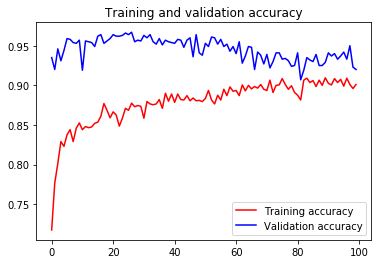

<Figure size 432x288 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150, 3))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 